<a href="https://colab.research.google.com/github/ShreyasJothish/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def cal_mean(data):
  """Compute the mean of data"""
  sum = 0
  for value in data:
    sum += value
  
  return sum / len(data)

def cal_var(data):
  mean = cal_mean(data)
  diffsqsum = 0
  
  for value in data:
    diffsqsum += ((value - mean) ** 2)
    
  return diffsqsum / len(data)

def cal_std(data):
  var = cal_var(data)
  
  return var ** 0.5

def cal_mean_sample(data):
  """Compute the mean of data"""
  total = 0
  for value in data:
    total += value
  
  return total/len(data)

def cal_var_sample(data):
  mean = cal_mean_sample(data)
  diffsqsum = 0
  
  for value in data:
    diffsqsum += ((value - mean) ** 2)
    
  return diffsqsum/(len(data)-1)

def cal_std_sample(data):
  var = cal_var_sample(data)
  
  return var ** 0.5

In [2]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print(cal_mean(sales))
print(cal_var(sales))
print(cal_std(sales))

print("\nCross verification with library functions\n")

import numpy as np
print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))

3052.714285714286
183761.06122448976
428.67360686714756

Cross verification with library functions

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [3]:
customervisit = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, customervisit)
print(covariance)

[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [4]:
stdsales = cal_std_sample(sales)
stdcustomervisit = cal_std_sample(customervisit)

#corrcoef = np.dot(covariance, 1 / (stdsales * stdcustomervisit))
# corrcoef = covariance / (stdsales ** 2 * stdcustomervisit ** 2)

divisionfactor = np.array([[stdsales **2, stdsales * stdcustomervisit],
                    [stdsales * stdcustomervisit, stdcustomervisit ** 2]])

corrcoef = np.divide(covariance, divisionfactor)

print(corrcoef)

print("\nCross verification with library functions\n")

print(np.corrcoef(sales, customervisit))

[[1.         0.96283398]
 [0.96283398 1.        ]]

Cross verification with library functions

[[1.         0.96283398]
 [0.96283398 1.        ]]


In [5]:
print(type(covariance))

print(covariance/(stdsales * stdcustomervisit))

<class 'numpy.ndarray'>
[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

url  = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"

df = pd.read_csv(url, index_col=0)

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [8]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [9]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

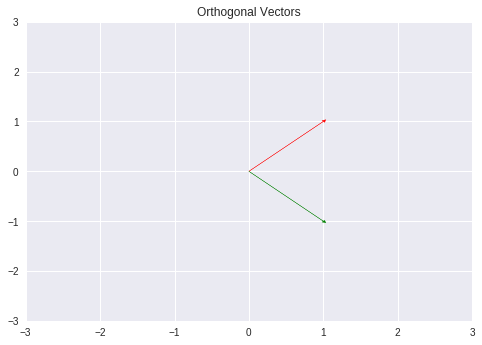

In [10]:
import matplotlib.pyplot as plt

vector_1 = [1, 1]
vector_2 = [1, -1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-3,3)
plt.title("Orthogonal Vectors")
plt.show()

In [11]:
"""Two vectors are said to be orthogonal if their dot product is 0. 
Synonym for orthogonal is perpendicular"""

print(np.dot(vector_1, vector_2))

0


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [12]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

print(np.dot(a, b))

-40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [13]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c) ** 2)
print(np.dot(c, c))
print(np.matmul(c.T, c))

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

1.
$$\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

2.

$$\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix},\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix},\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$$


\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} -8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [14]:
f = np.array([4, 12, 11, 9 , 2])
norm = np.linalg.norm(f)

print("norm:", norm)

print(f/norm)

norm: 19.131126469708992
[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

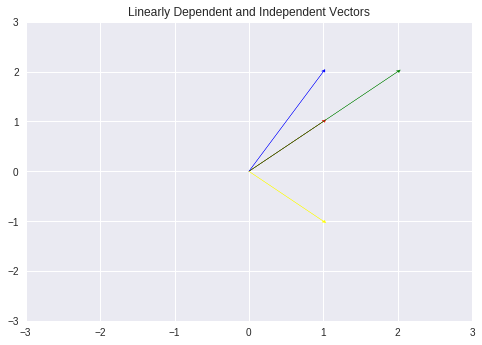

In [15]:
vector_1 = [1, 1]
vector_2 = [2, 2]
vector_3 = [1, 2]
vector_4 = [1, -1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, vector_3[0], vector_3[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vector_4[0], vector_4[1],head_width=.05, head_length=0.05, color ='yellow')
plt.xlim(-3,3)          
plt.ylim(-3,3)
plt.title("Linearly Dependent and Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

**Answer:** The span is all the vectors which fall on the line.

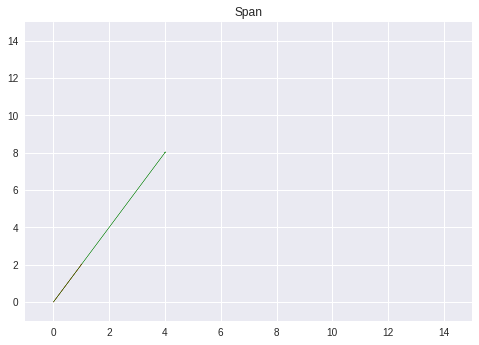

In [16]:
vector_1 = [1, 2]
vector_2 = [4, 8]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,15)          
plt.ylim(-1,15)
plt.title("Span")
plt.show()

In [17]:
test = np.array([[1, 2],
               [4, 8]])

print(np.linalg.matrix_rank(test))

1


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

**Answer:**: The span of l, m and n is entire 3 D space.

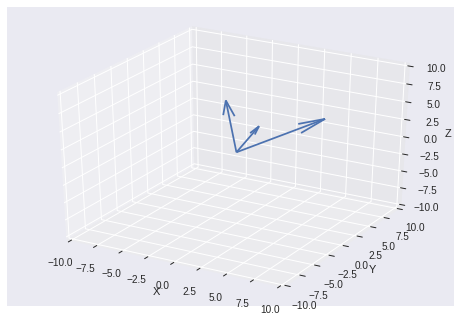

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

vectors = np.array([[0, 0, 0, 1, 2, 3],
                   [0, 0, 0, -1, 0, 7],
                   [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [19]:
test = np.array([[1, 2, 3],
               [-1, 0, 7],
               [4, 8, 2]])

print(np.linalg.matrix_rank(test))

3


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



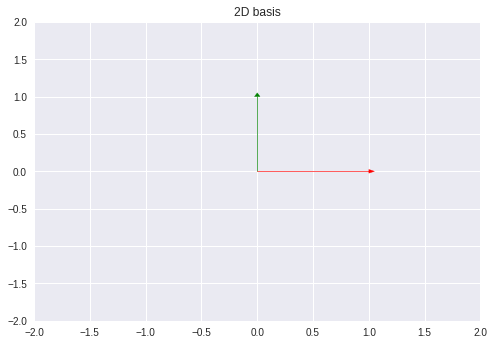

In [20]:
vector_1 = [1, 0]
vector_2 = [0, 1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-2,2)          
plt.ylim(-2,2)
plt.title("2D basis")
plt.show()

## 6.2 What does it mean to form a basis?

Using the basis vector, we can reach any other vector by their linear combination. 

For example in 2D space, using basis vector $\hat{i}$ and $\hat{j}$ we can reach any other vector in 2D space by linear combination (scaling and addition) of $\hat{i}$ and $\hat{j}$.

$$\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [21]:
P = np.array([[1, 2, 3],
             [-1, 0, 7],
             [4, 8, 2]])

print(np.linalg.matrix_rank(P))

3


## 7.2 What does the rank of a matrix tell us?

The rank of the matrix provides information on its span. Even if there are 3X3 matrix, rank can be 2 indicating the columns or vectors cannot span the complete 3D space.


# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


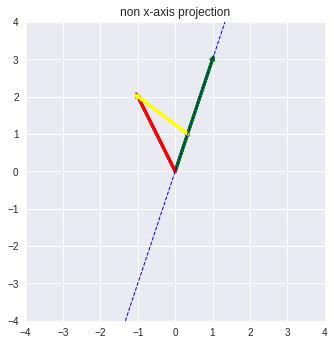

In [22]:
# Axis Bounds
plt.xlim(-4,4)          
plt.ylim(-4,4)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = np.multiply(1/3,v)
x_minus_proj = w-proj

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

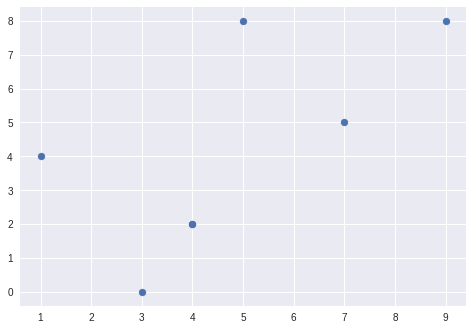

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()